Text(0.5, 1.0, 'Original Image')

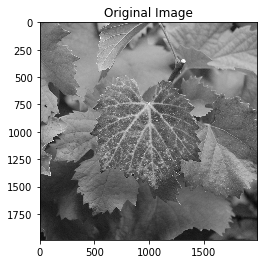

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

#plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
img = cv2.imread("./image/flower.jpg", 0)

#plt.subplot(151)
plt.imshow(img, "gray")
plt.title("Original Image")



Text(0.5, 1.0, 'Spectrum')

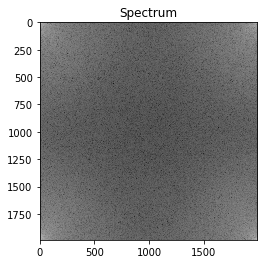

In [7]:
original = np.fft.fft2(img)
#plt.subplot(152)
plt.imshow(np.log(1+np.abs(original)), "gray")
plt.title("Spectrum")


Text(0.5, 1.0, 'Centered Spectrum')

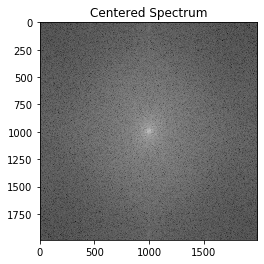

In [8]:
center = np.fft.fftshift(original)
#plt.subplot(153)
plt.imshow(np.log(1+np.abs(center)), "gray")
plt.title("Centered Spectrum")


(<matplotlib.image.AxesImage at 0x1b7e6b5cac8>,
 Text(0.5, 1.0, 'Decentralized'))

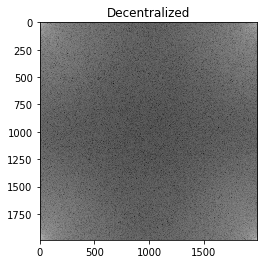

In [9]:
inv_center = np.fft.ifftshift(center)
#plt.subplot(154)
plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")


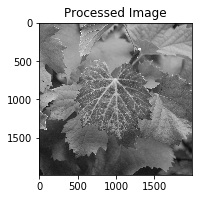

Text(0.5, 1.0, 'Original Image')

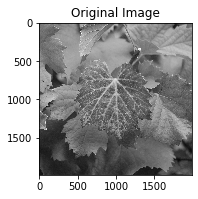

In [11]:
processed_img = np.fft.ifft2(inv_center)
plt.subplot(121)
plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")
plt.show()
plt.subplot(122)
plt.imshow(img, "gray")
plt.title("Original Image")


# Video  2 way

In [77]:
img = cv2.imread("./image/flower.jpg", 0)

In [78]:
dft = cv2.dft(np.float32(img),flags= cv2.DFT_COMPLEX_OUTPUT)#comples oupt j component 
#img in 8bit

dft_shift = np.fft.fftshift(dft)
magnitude_spc = 20 * np.log( ( cv2.magnitude(dft_shift[ :,:,0],dft_shift[:,:,1])))

In [79]:
#create mask circle  

row,col =img.shape
crow,ccol = int(row/2)  ,int(col/2)

mask = np.ones((row,col,2),np.uint8)
r=120
centre = [crow,ccol]
x ,y = np.ogrid[:row,:col]#Ogrid stands for “open grid”
#and basically provides a way to act on specific pixels of an image based on their row and column index

mask_area = (x - centre[0])**2+(y - centre[1])**2 <= r*r
mask[mask_area] =1 #high

In [80]:
fshift = dft_shift * mask #multple

fshift_mask_img = 20 * np.log( ( cv2.magnitude(fshift[ :,:,0],fshift[:,:,1])))

f_ishift =np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

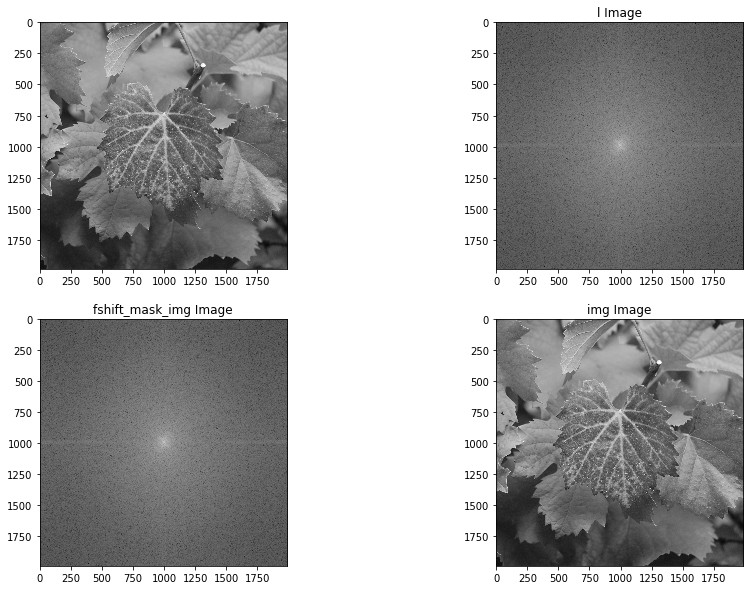

In [81]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(img, "gray")

plt.subplot(222)
plt.imshow(magnitude_spc, "gray")
plt.title("l Image")

plt.subplot(223)
plt.imshow(fshift_mask_img, "gray")
plt.title("fshift_mask_img Image")


plt.subplot(224)
plt.imshow(img_back, "gray")
plt.title("img Image")

plt.show()